# Ejercicios Clase 06. Autómatas Celulares

Cada ejercicio tiene una celda en blanco para que escriba su propio código. Puede crear celdas extras en caso de ser necesario, o simplemente por comodidad. Al momento de resolver los ejercicios utilice sus propias variables con nombres que ayuden a la comprensión del problema.


## Ejercicio 0

Cree una grilla de $N\times N$ elementos utilizando un arra 2d de NumPy. Luego complete la grilla de la siguiente manera:

* El primer elemento (o celda) de la primera fila debe tener un valor de 1, y el resto un valor de 0.
* Los primeros dos elementos de la segunda fila deben ser 1, y el resto 0.
* Los primeros `i` elementos de la `i`-ésima fila son 1, y el resto 0.


Luego grafique esta grilla utilizando la función `plt.imshow()` de matplotlib.

Utilice $N = 10$ para empezar.

(-0.5, 9.5, 9.5, -0.5)

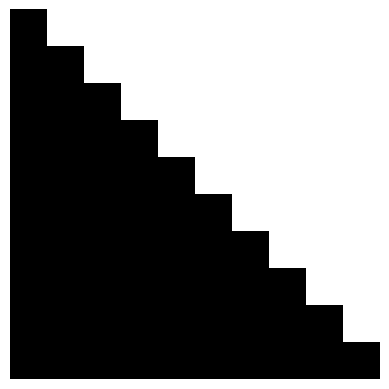

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la Grilla
N = 10
grilla = np.zeros([N, N])

# Completar la Grilla
for fila in range(N):
    grilla[fila, :fila+1] = 1

# Graficar
plt.imshow(grilla, cmap='binary')
plt.axis("off")


# Ejercicio 1

Escribir un código para implementar la evolución del autómata celular siguiendo la Regla D.

### Regla D

La celda j se activa si una y sólo una del vecindario [j - 1, j, j + 1] 
está activa, o si sólo j y j + 1 están activas. Si no, se desactiva

Text(0, 0.5, 't')

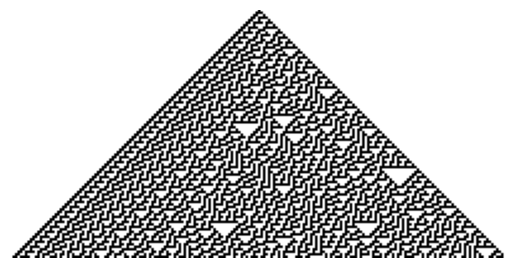

In [2]:
# variables
N_celdas = 200
tmax = round(N_celdas/2)
matriz = np.zeros((tmax, N_celdas), dtype=int)

# Condiciones iniciales
matriz[0, round(N_celdas/2)] = 1
#matriz[0] = np.random.randint(0, 2, size=N_celdas)

# actualizamos la matriz para t > 0
for t in range(1, tmax):
    for col in range(1, N_celdas-1):
        matriz[t,col] = (
            (matriz[t-1, col-1] and not matriz[t-1,col] and not matriz[t-1, col+1]) or
            (not matriz[t-1, col-1] and matriz[t-1,col] and not matriz[t-1, col+1]) or
            (not matriz[t-1, col-1] and not matriz[t-1,col] and matriz[t-1, col+1]) or
            (not matriz[t-1, col-1] and matriz[t-1,col] and matriz[t-1, col+1]) 
        )
    # borde izquierdo
    #matriz[t,0] = matriz[t-1, 1]
    # borde derecho
    #matriz[t,-1] = matriz[t-1, -2]

plt.imshow(matriz, cmap="binary")
plt.axis("off")
plt.ylabel("t")

# Ejercicio 2

Implementar el juego de la vida de Conway completando el código faltante.


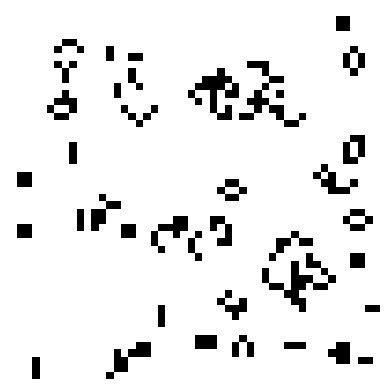

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Primero definimos nuestras Variables:
N = 50   
tmax = 30

# RESOLVER: Grilla de puntos con condicione iniciales
grid = np.random.randint(0, 2, (N, N))

# RESOLVER: Función que actualiza el grilla
def actualizar_grid(grid):
    """Esta función actualiza la grilla un paso temporal"""
    grid_before = np.copy(grid)
    for row in range(N):
        for col in range(N):
            vecindario = grid_before[row-1:row+2, col-1:col+2]
            suma = vecindario.sum() - grid_before[row, col]
            if suma == 2:
                continue
            if suma == 3:
                grid[row, col] = 1
                continue
            if (suma > 3) or (suma < 2):
                grid[row, col] = 0
                continue
    return grid


# El siguiente código se encarga del gráfico y la animación
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap="binary")
ax.set_axis_off()

# Las siguientes funciones (init y update) nos ayudan con la animación
def init():
    im.set_data(grid)
    return (im,)

def update(i):
    global grid
    grid = actualizar_grid(grid)
    im.set_data(grid)

    return (im,)

anim = animation.FuncAnimation(fig, func=update, init_func=init, frames=tmax, interval=200)
HTML(anim.to_jshtml())  # usar esto en caso de usar una jupyter notebook
#plt.show() # usar esto en caso de ejecutar el script
